In [49]:
# !pip install wordcloud

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

2(News): the tweet links to factual news about climate change

1(Pro): the tweet supports the belief of man-made climate change

0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1(Anti): the tweet does not believe in man-made climate change


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import string

import warnings
warnings.filterwarnings("ignore")

In [51]:
Tweets_df = pd.read_csv("twitter_sentiment_data.csv")

In [52]:
Tweets_df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [53]:
n_rows, _ = Tweets_df.shape

In [54]:
#Check for null
Tweets_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [55]:
Tweets_df_copy = Tweets_df.copy()

In [56]:
Tweets_df_copy.drop(columns=["tweetid"], inplace=True)

In [57]:
Tweets_df_copy.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [58]:
Tweets_df_copy.sentiment.unique()

array([-1,  1,  2,  0])

In [87]:
data = Tweets_df_copy

In [88]:
data.shape

(43943, 2)

In [89]:
data.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [90]:
dist = data.sentiment.value_counts()

In [91]:
dist = pd.Series(dist)

<AxesSubplot:>

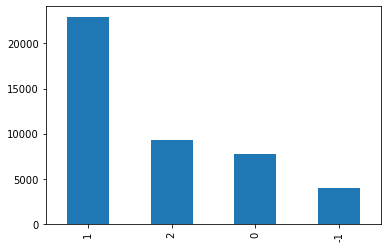

In [92]:
dist.plot(kind='bar')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
dtypes: int64(1), object(1)
memory usage: 686.7+ KB


# Word cloud generation - Factual Change , Belief of Change , No Comment and Non-Believer

In [94]:
from wordcloud import WordCloud
import re

In [95]:
tweet_list_Factual_Change = data[data.sentiment == 2]
tweet_list_Belief_of_Change = data[data.sentiment == 1]
tweet_list_Neutral = data[data.sentiment == 0]
tweet_list_Non_Believer = data[data.sentiment == -1]

In [96]:
"""letters_only_tweet_list_Factual_Change = re.sub("[^a-zA-Z]", " ", str(tweet_list_Factual_Change))
letters_only_tweet_list_Belief_of_Chang = re.sub("[^a-zA-Z]", " ", str(tweet_list_Belief_of_Change))
letters_only_tweet_list_Neutral = re.sub("[^a-zA-Z]", " ", str(tweet_list_Neutral))
letters_only_tweet_list_Non_Believer = re.sub("[^a-zA-Z]", " ", str(tweet_list_Non_Believer))"""

'letters_only_tweet_list_Factual_Change = re.sub("[^a-zA-Z]", " ", str(tweet_list_Factual_Change))\nletters_only_tweet_list_Belief_of_Chang = re.sub("[^a-zA-Z]", " ", str(tweet_list_Belief_of_Change))\nletters_only_tweet_list_Neutral = re.sub("[^a-zA-Z]", " ", str(tweet_list_Neutral))\nletters_only_tweet_list_Non_Believer = re.sub("[^a-zA-Z]", " ", str(tweet_list_Non_Believer))'

In [97]:
sentiment_tweet_group = [tweet_list_Factual_Change , tweet_list_Belief_of_Change, tweet_list_Neutral, tweet_list_Non_Believer]

In [98]:
#converting all tweet list groups into letter only for word cloud

for tweet_group_df in sentiment_tweet_group:
    tweet_group_df['letters_only'] = re.sub("[^a-zA-Z]", " ", str(tweet_group_df))


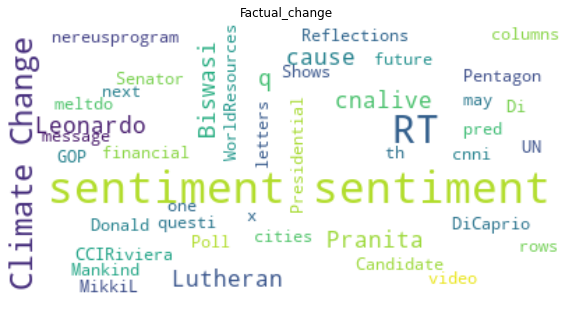

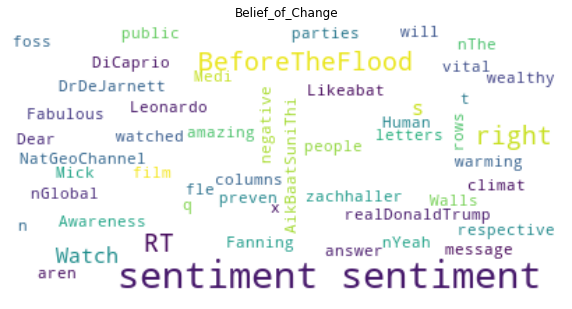

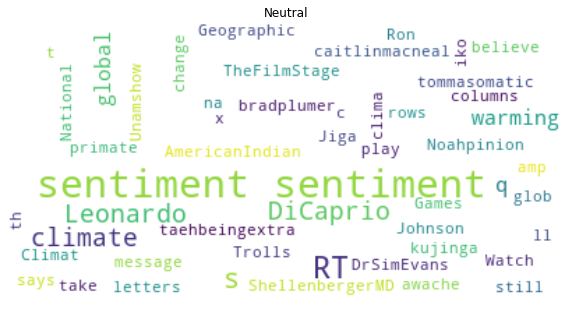

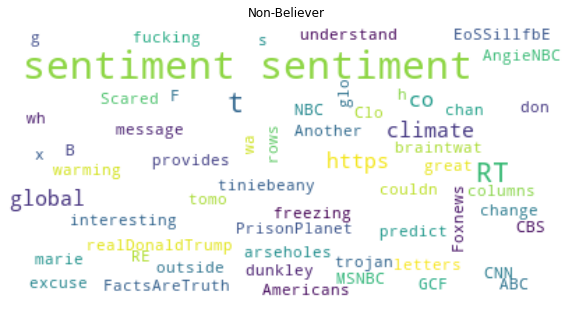

In [99]:
# Plot each word cloud
title_list = ['Factual_change','Belief_of_Change','Neutral','Non-Believer']

i = 0
for tweet_group_df in sentiment_tweet_group:
    wordcloud = WordCloud(background_color="white").generate(re.sub("[^a-zA-Z]", " ", str(tweet_group_df)))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_list[i])
    i = i+1
    plt.show()

# Pre-Processing

In [123]:
Tweets_cleaned = pd.DataFrame()

In [132]:
def clean_text(row, options):

    if options['remove_url']:
        row = row.replace('http\S+|www.\S+', '')

    if options['remove_mentions']:
        #row = row.replace('@[A-Za-z0-9]+', '')
        row = re.sub("@[A-Za-z0-9_]+","", row)
        #removing RT
        row = row.replace("RT","")

    return row

clean_config = {
    'remove_url': True,
    'remove_mentions': True,
    }

Tweets_cleaned['message'] = Tweets_df_copy['message'].apply(clean_text, args=(clean_config,))
Tweets_cleaned['sentiment'] = Tweets_df_copy['sentiment']

In [133]:
Tweets_df_copy.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,@NatGeoChannel: Watch #BeforeTheFlood right h...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,@Mick_Fanning: Just watched this amazing docu...
4,2,"@cnalive: Pranita Biswasi, a Lutheran from Od..."


In [134]:
Tweets_cleaned.head()

,message,sentiment
0,climate change is an interesting hustle as it...,-1
1,": Watch #BeforeTheFlood right here, as trave...",1
2,Fabulous! Leonardo #DiCaprio's film on #climat...,1
3,: Just watched this amazing documentary by le...,1
4,": Pranita Biswasi, a Lutheran from Odisha, gi...",2


In [136]:
Cleaned_tweet_list_Factual_Change = Tweets_cleaned[Tweets_cleaned.sentiment == 2]
Cleaned_tweet_list_Belief_of_Change = Tweets_cleaned[Tweets_cleaned.sentiment == 1]
Cleaned_tweet_list_Neutral = Tweets_cleaned[Tweets_cleaned.sentiment == 0]
Cleaned_tweet_list_Non_Believer = Tweets_cleaned[Tweets_cleaned.sentiment == -1]

clean_sentiment_tweet_group = [Cleaned_tweet_list_Factual_Change , Cleaned_tweet_list_Belief_of_Change, Cleaned_tweet_list_Neutral, Cleaned_tweet_list_Non_Believer]

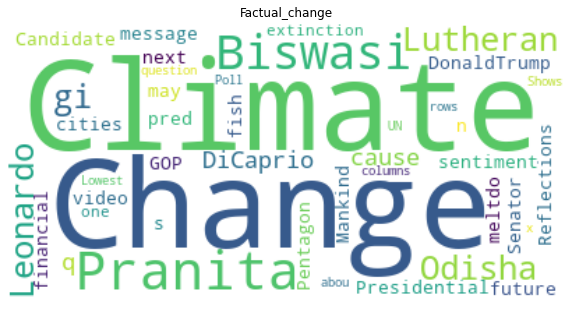

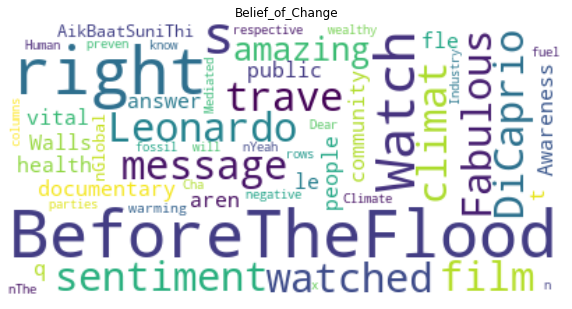

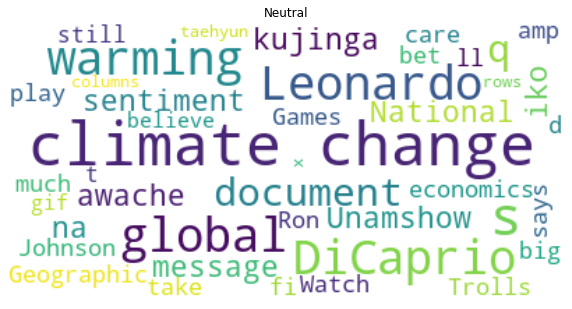

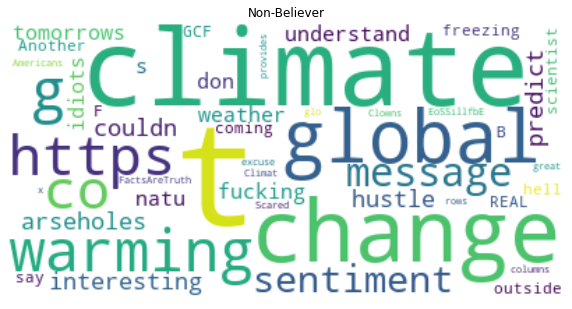

In [137]:
# Plot each word cloud - Cleaned Data
title_list = ['Factual_change','Belief_of_Change','Neutral','Non-Believer']

i = 0
for tweet_group_df in clean_sentiment_tweet_group:
    wordcloud = WordCloud(background_color="white").generate(re.sub("[^a-zA-Z]", " ", str(tweet_group_df)))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_list[i])
    i = i+1
    plt.show()

In [100]:
X = pd.DataFrame(data.message)
y = pd.DataFrame(data.sentiment)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [102]:
combine = [X_train, X_test]

In [103]:
#convert all strings to lower

for dataset in combine:
    dataset.message = dataset.message.str.lower()

In [104]:
#Word_Count

for dataset in combine:
    dataset['word_count']  = dataset['message'].apply(lambda x: len(str(x).split()))

#punctuation count

for dataset in combine:
    dataset['punctuation_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [105]:
import nltk
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [106]:
reduced_stopwords = \
['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", \
"you'd", 'your', 'yours', 'yourself', 'yourselves', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', \
'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',\
'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', \
'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',\
'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', \
'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', \
'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',\
'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', "don't", \
'should', "should've", 'now', 'couldn', \
"couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", \
'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', \
"needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [107]:
def remove_stop_words(text):
    for word in reduced_stopwords:
        text = text.replace(word, '')
    return text

for dataset in combine:
    dataset['message']  = dataset['message'].apply(remove_stop_words)

In [108]:
"""#Stop Word count - from nltk

STOPWORDS = stopwords.words('english')

for dataset in combine:
    dataset['stop_word_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c in STOPWORDS]))"""

"#Stop Word count - from nltk\n\nSTOPWORDS = stopwords.words('english')\n\nfor dataset in combine:\n    dataset['stop_word_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c in STOPWORDS]))"

In [109]:
# hashtag_count
for dataset in combine:
    dataset['hashtag_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c == '#']))

In [110]:
# mention_count
for dataset in combine:
    dataset['mention_count']  = dataset['message'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [111]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

for dataset in combine:
    dataset['message']  = dataset['message'].apply(remove_punctuations)

In [112]:
# mean_word_length

for dataset in combine:
    dataset['mean_word_length']  = dataset['message'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [113]:
X_train.head()

,message,word_count,punctuation_count,hashtag_count,mention_count,mean_word_length
24878,rt nytwld lic ste clime change seen wld’s gr...,16,14,0,1,6.000000
19365,h fight global warmg plant me trees n’t te we...,21,6,0,0,4.105263
10193,rt greenpeace tropical plants p anils affect...,19,5,0,1,5.785714
41958,big jy australians say turnbulllcolm g ltle ...,17,9,2,1,6.384615
31379,sa te global warmg real,8,0,0,0,3.800000


In [114]:
X_test.head()

,message,word_count,punctuation_count,hashtag_count,mention_count,mean_word_length
2418,rt rniesers ccept global warmg creed f c...,21,6,0,1,5.230769
33837,cooler ocean big swf esnt an global warmg slo...,14,8,0,0,5.166667
26941,acosta global warmg�� httpstcorqbfnxzs,5,11,0,1,8.750000
41316,thg thg global warmg httpstcoeb5ltj5k,5,6,0,0,6.600000
26353,rt mleewalker ur mcm teted need start takg c...,24,4,0,1,4.000000


Target - 7th Nov
- Build a basic model and maximize accuracy withe the given features

Target - Final
 - Explore more algorithms
 - Improve generalizability of the model.
 